In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [10]:
rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

In [11]:
np.shape(X)

(20, 2)

In [12]:
X_train

array([[ 2.14901425,  1.95852071],
       [ 2.19430656,  2.45690896],
       [ 1.92975399,  1.92975891],
       [ 2.47376384,  2.23023042],
       [ 1.85915768,  2.16276801],
       [ 1.86097469,  1.86028107],
       [ 2.07258868,  1.42601593],
       [ 1.48252465,  1.83131374],
       [ 1.69615066,  2.0942742 ],
       [ 1.72759278,  1.57630889],
       [ 2.43969463,  1.93226711],
       [ 2.02025846,  1.57257554],
       [ 1.83668518,  2.03327678],
       [ 1.65470193,  2.11270941],
       [ 1.81980839,  1.91249188],
       [ 1.81948802,  2.55568346],
       [ 1.99595083,  1.68268672],
       [ 2.24676347,  1.63374691],
       [ 2.06265908,  1.41209896],
       [ 1.60154419,  2.05905837],
       [ 2.22153997,  2.05141048],
       [ 1.96530552,  1.90966889],
       [ 1.5564434 ,  1.78404674],
       [ 1.86180837,  2.31713667],
       [ 2.10308549,  1.47108795],
       [ 2.09722519,  1.88447532],
       [ 1.7969234 ,  2.18350289],
       [ 2.30929986,  2.27938404],
       [ 1.74823474,

In [67]:
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(X_outliers))

(200, 2)
(40, 2)
(20, 2)


In [68]:
X_train[0]

array([2.14901425, 1.95852071])

In [69]:
# fit the model
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
clf = IsolationForest(max_samples=100,
                      max_features=2,
                      random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [70]:
print(np.shape(y_pred_train))
print(np.shape(y_pred_test))
print(np.shape(y_pred_outliers))

(200,)
(40,)
(20,)


In [71]:
y_pred_train

array([ 1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [72]:
y_pred_test

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1])

In [73]:
y_pred_outliers

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

In [74]:
print(type(X_test))

<class 'numpy.ndarray'>


In [75]:
# Dividing the test and train data as outliars and inliars
import collections
c = collections.Counter(y_pred_test)
#print(c[1],c[-1])

X_test_out = np.zeros((c[-1],2))
X_test_in = np.zeros((c[1],2))
cnt1 = 0
cnt2 = 0
for i in range(0,len(y_pred_test)):
    if y_pred_test[i] == -1:
        #print(X_test[i])
        X_test_out[cnt1,0] = X_test[i][0]
        X_test_out[cnt1,1] = X_test[i][1]
        cnt1 = cnt1+1
    else:
        X_test_in[cnt2,0] = X_test[i][0]
        X_test_in[cnt2,1] = X_test[i][1]
        cnt2 = cnt2+1
#print(X_test_out)
#print(X_test_in)

c = collections.Counter(y_pred_train)
#print(c[1],c[-1])

X_train_out = np.zeros((c[-1],2))
X_train_in = np.zeros((c[1],2))
cnt1 = 0
cnt2 = 0
for i in range(0,len(y_pred_train)):
    if y_pred_train[i] == -1:
        #print(X_test[i])
        X_train_out[cnt1,0] = X_train[i][0]
        X_train_out[cnt1,1] = X_train[i][1]
        cnt1 = cnt1+1
    else:
        X_train_in[cnt2,0] = X_train[i][0]
        X_train_in[cnt2,1] = X_train[i][1]
        cnt2 = cnt2+1
#print(X_train_out)
#print(X_train_in)

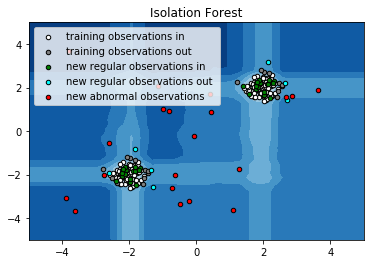

In [76]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Isolation Forest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1_in = plt.scatter(X_train_in[:, 0], X_train_in[:, 1], c='white',
                 s=20, edgecolor='k')
b1_out = plt.scatter(X_train_out[:, 0], X_train_out[:, 1], c='gray',
                 s=20, edgecolor='k')
b2_in = plt.scatter(X_test_in[:, 0], X_test_in[:, 1], c='green',
                 s=20, edgecolor='k')
b2_out = plt.scatter(X_test_out[:, 0], X_test_out[:, 1], c='cyan',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')


plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1_in, b1_out,b2_in, b2_out, c],
           ["training observations in",
            "training observations out",
            "new regular observations in ",
            "new regular observations out ","new abnormal observations"],
           loc="upper left")
plt.show()